<a href="https://colab.research.google.com/github/Ayah1234/Histo/blob/Ayah1234-patch-1/BHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow  as tf
import numpy as np 
import pandas as pd 
from PIL import Image
from skimage.io import imread
from os import listdir
import seaborn as sns
sns.set()
import cv2
import os



# **Read data.csv**

In [4]:
data = pd.read_csv('/content/gdrive/My Drive/Kaggle_dataset/data.csv')

# **Prepare 50000 images for training**

In [ ]:
img_array50k = []
labels_array50k =[] 
for p in range(50000):
  img = np.array(imread(data.loc[p]['path']))
  label = (data.loc[p]['label'])
  img = np.resize(img, [50, 50,3])
  img.astype('float32')
  img = img/255
  img_array50k.append(img)
  labels_array50k.append(label) 
np.save('imgArray50k.npy',img_array50k)
np.save('labelArray50k.npy',labels_array50k)
!cp imgArray50k.npy labelArray50k.npy "/content/gdrive/My Drive/Kaggle_dataset/"

# **Load image and labels arrays**

In [7]:
img_array = np.load('/content/gdrive/My Drive/Kaggle_dataset/imgArray50k.npy')
labels_array = np.load('/content/gdrive/My Drive/Kaggle_dataset/labelArray50k.npy')

# **Check the data balance** 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


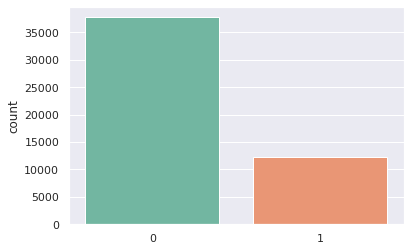

In [5]:
sns.countplot(labels_array, palette="Set2");

# **Prepare train/test dataset..**

In [8]:
x=np.stack(img_array)
y=to_categorical(labels_array)
#y=labels_array
train_images,test_images,train_labels,test_labels=train_test_split(x,y,random_state=0,test_size=0.2)

In [14]:
model=Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(50,50,3)),
    MaxPool2D((2,2)),
    BatchNormalization(),
    #Dropout(0.2),
    Conv2D(128,(3,3),activation='relu',padding='same'),
    MaxPool2D((2,2)),
    BatchNormalization(),
    #Dropout(0.25),
    Conv2D(256,(3,3),activation='relu',padding='same'),
    MaxPool2D((2,2)),
    BatchNormalization(),
    #Dropout(0.3),
    Conv2D(512,(3,3),activation='relu',padding='same'),
    MaxPool2D((2,2)),
    BatchNormalization(),
    #Dropout(0.2),
    Flatten(),
    Dense(1024,activation='relu'),
    Dense(2,activation='sigmoid')
])

In [15]:
model.compile(optimizer='Adam',loss='mae',metrics=['acc'])

In [16]:
model.fit(train_images,train_labels,epochs=15,validation_split=0.3,batch_size=56)

Epoch 1/15
500/500 [==============================] - 585s 1s/step - loss: 0.2178 - acc: 0.7850 - val_loss: 0.2442 - val_acc: 0.7558
Epoch 2/15
500/500 [==============================] - 586s 1s/step - loss: 0.2440 - acc: 0.7560 - val_loss: 0.2442 - val_acc: 0.7558
Epoch 3/15
500/500 [==============================] - 590s 1s/step - loss: 0.2440 - acc: 0.7560 - val_loss: 0.2442 - val_acc: 0.7558
Epoch 4/15
500/500 [==============================] - 591s 1s/step - loss: 0.2440 - acc: 0.7560 - val_loss: 0.2442 - val_acc: 0.7558
Epoch 5/15
500/500 [==============================] - 591s 1s/step - loss: 0.2440 - acc: 0.7560 - val_loss: 0.2442 - val_acc: 0.7558
Epoch 6/15
500/500 [==============================] - 590s 1s/step - loss: 0.2440 - acc: 0.7560 - val_loss: 0.2442 - val_acc: 0.7558
Epoch 7/15
500/500 [==============================] - 592s 1s/step - loss: 0.2440 - acc: 0.7560 - val_loss: 0.2442 - val_acc: 0.7558
Epoch 8/15
500/500 [==============================] - 588s 1s/step - 

# **Save the Trained Model**

In [18]:
tf.keras.models.save_model(model,'/content/gdrive/My Drive/Kaggle_dataset/')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Kaggle_dataset/assets


# **Load the Trained Model**

In [6]:
model = tf.keras.models.load_model('/content/gdrive/My Drive/Kaggle_dataset/')

# **Evaluate the model**

In [19]:
loss,accuracy=model.evaluate(test_images,test_labels)

313/313 [==============================] - 48s 152ms/step - loss: 0.2464 - acc: 0.7536


In [13]:
test_images.shape

(10000, 50, 50, 3)

# **Test the model**

In [20]:
predictions = model.predict(test_images)
print(predictions[0])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [26]:
predictions[500]

array([1., 0.], dtype=float32)

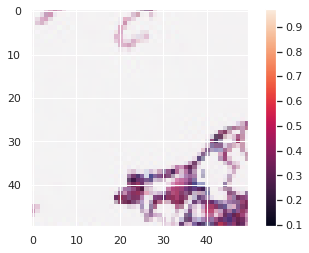

In [27]:
plt.figure()
plt.imshow(test_images[500])
plt.colorbar()
plt.show()